![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

# Skin lesion recognition in 7 classes:

*  0: 'akiec' - actinic keratosis

*  1: 'bcc' - basal cell carcinoma

*  2: 'bkl' - benign keratosis

*  3: 'df' - dermatofibroma

*  4: 'mel' - melanoma

*  5: 'nv' - melanocytic nevus

*  6: 'vasc' - vascular lesion

Based on https://medium.com/thecyphy/train-cnn-model-with-pytorch-21dafb918f48

Reference:

Mery, D. et al. (2023). [On Skin Lesion Recognition Using Deep Learning: 50 Ways to Choose Your Model](https://link.springer.com/chapter/10.1007/978-3-031-26431-3_9). In: Wang, H., et al. Image and Video Technology. PSIVT 2022. Lecture Notes in Computer Science, vol 13763. Springer, Cham.


In [ ]:
# skin lesions: 7 classes
!wget https://www.dropbox.com/s/nzrvuoos7sgl5dh/exp4val.zip
!unzip -qq exp4val.zip

--2023-07-19 13:51:07--  https://www.dropbox.com/s/nzrvuoos7sgl5dh/exp4val.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.67.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.67.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/nzrvuoos7sgl5dh/exp4val.zip [following]
--2023-07-19 13:51:08--  https://www.dropbox.com/s/raw/nzrvuoos7sgl5dh/exp4val.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc10bc866bb55abca7452f8546c.dl.dropboxusercontent.com/cd/0/inline/CAKu3b6GFsziLmm3P2LgqjUpfEc5xfatMY54Pik3QzltjVdLER3bnMV5FRuFDNxUA4Wcj0-okYxB-QMEvvtdUiPjikiIh7l8oKwWDzMBDRw_FhGtROvm4h6KF2zAEIFFYX3305VgmaEuzO2UmVhJb1ED4YKlnSH017Jm23WLoaVCDg/file# [following]
--2023-07-19 13:51:09--  https://ucc10bc866bb55abca7452f8546c.dl.dropboxusercontent.com/cd/0/inline/CAKu3b6GFsziLmm3P2LgqjUpfEc5xfatMY54Pik3QzltjVdLER3bnMV5FRuFDNxUA4Wcj0-okYxB-QME

In [ ]:
import torch
import torchvision
from   torchvision import transforms
from   torchvision.datasets import ImageFolder
from   torch.utils.data.dataloader import DataLoader
from   torch.utils.data import random_split
from   sklearn.metrics import confusion_matrix, accuracy_score

#train and test data directory

train_dir = "train/"
val_dir   = "val/"
test_dir  = "test/"

#load the train and test data
train_set = ImageFolder(train_dir,transform = transforms.Compose([
    transforms.Resize((64,64)),transforms.RandomHorizontalFlip(),transforms.ToTensor()]))

val_set = ImageFolder(val_dir,transform = transforms.Compose([
    transforms.Resize((64,64)),transforms.ToTensor()]))

test_set = ImageFolder(test_dir,transforms.Compose([
    transforms.Resize((64,64)),transforms.ToTensor()]))

img,_ = train_set[0]
print('Size image: '+ str(img.shape))
print('   Classes: ',train_set.classes)

Size image: torch.Size([3, 64, 64])
   Classes:  ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6']


In [ ]:
!wget https://www.dropbox.com/s/2q224dslxdiag7i/cnn_utils.py
from cnn_utils import *
print('cnn_utils module has been loaded')

--2023-07-19 13:53:00--  https://www.dropbox.com/s/2q224dslxdiag7i/cnn_utils.py
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/2q224dslxdiag7i/cnn_utils.py [following]
--2023-07-19 13:53:00--  https://www.dropbox.com/s/raw/2q224dslxdiag7i/cnn_utils.py
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdebed0acbd668a26aeeaa17dc6.dl.dropboxusercontent.com/cd/0/inline/CAKJSKweCLvOYEHQoCx2758MaUKNrw6cM3Y2SdLcoZY5eqRdl_FPwRnv1hyXIg2TufY8kgFePjXQoQrlM2oRXNK7D1PIA3TAKxR43qGNJ4tV90HrLkZqdzRph3nio7d_JMdPZnHex26kgTyCsjjE6rqy-PYq1PU8D3T2o_uyCi5zQA/file# [following]
--2023-07-19 13:53:01--  https://ucdebed0acbd668a26aeeaa17dc6.dl.dropboxusercontent.com/cd/0/inline/CAKJSKweCLvOYEHQoCx2758MaUKNrw6cM3Y2SdLcoZY5eqRdl_FPwRnv1hyXIg2TufY8kgFePjXQo

Image: 1125, Label : class_1


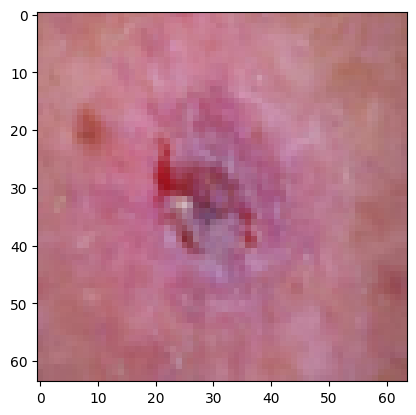

In [ ]:
#display an image in the training dataset
display_img(train_set,1125)

In [ ]:
#load the train and validation into batches.

batch_size = 150

print(f"Length of Train Data : {len(train_set)}")
print(f"Length of Validation Data : {len(val_set)}")

train_dl = DataLoader(train_set, batch_size, shuffle = True, num_workers = 2, pin_memory = True)
val_dl   = DataLoader(val_set  , batch_size, num_workers = 4, pin_memory = True)

Length of Train Data : 7350
Length of Validation Data : 1050


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


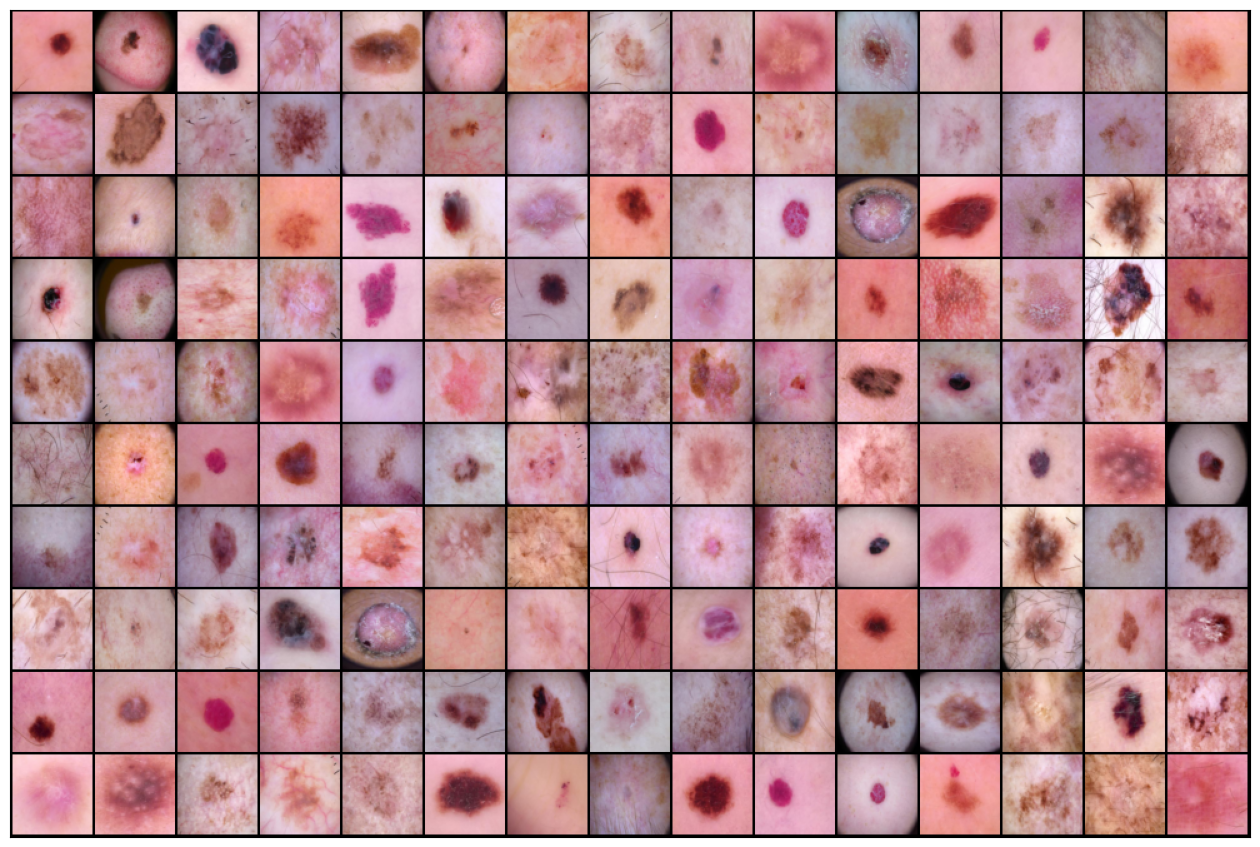

In [ ]:
show_batch(train_dl,nrow=15)

In [ ]:
# Reduced Model
class CNN_Classification(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(

            nn.Conv2d(3, 8, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(8,16, kernel_size = 3, stride = 2, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(16, 32, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(32,32, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Flatten(),
            nn.Linear(2048,1024),
            nn.Linear(1024,128),
            nn.Linear(128,7),
            nn.Dropout(0.25)
        )

    def forward(self, xb):
        return self.network(xb)


In [ ]:
# Large Model
class CNN_Classification(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(

            nn.Conv2d(3, 32, kernel_size = 3, padding = 1),
            nn.ReLU(),
            nn.Conv2d(32,64, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(128 ,128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(128, 256, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(256,256, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Flatten(),
            nn.Linear(16384,128), #1024
            nn.ReLU(),
            nn.Linear(128, 64), #512
            nn.ReLU(),
            nn.Linear(64,7) #6
        )

    def forward(self, xb):
        return self.network(xb)


In [ ]:
model =  CNN_Classification()
print(model)

CNN_Classification(
  (network): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Flatten(start_dim=1, end_dim=-1)
    (11): Linear(in_features=2048, out_features=1024, bias=True)
    (12): Linear(in_features=1024, out_features=128, bias=True)
    (13): Linear(in_features=128, out_features=7, bias=True)
    (14): Dropout(p=0.25, inplace=False)
  )
)


In [ ]:
#fitting the model on training data and record the result after each epoch
num_epochs = 100
opt_func   = torch.optim.Adam
lr         = 0.0005
history    = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch    Train-Loss   Val-Loss    Val-Acc   Best    Time [sec]
------------------------------------------------------------------
    0      1.8706      1.6999      0.3095    ***      24.1 
    1      1.6769      1.5375      0.3943    ***      23.5 
    2      1.5403      1.3970      0.4476    ***      23.9 
    3      1.4780      1.3612      0.4381             23.2 
    4      1.4277      1.3408      0.4400             22.5 
    5      1.3903      1.2958      0.4886    ***      22.8 
    6      1.3521      1.2852      0.4790             23.5 
    7      1.3094      1.2333      0.5562    ***      23.2 
    8      1.2963      1.2286      0.4867             23.0 
    9      1.2764      1.2097      0.5610    ***      21.8 
   10      1.2224      1.1650      0.5629    ***      22.8 
   11      1.1925      1.1756      0.5905    ***      22.8 
   12      1.1457      1.1398      0.5619             22.1 
   13      1.1519      1.1328      0.5467             21.7 
   14      1.1237      1.1835 

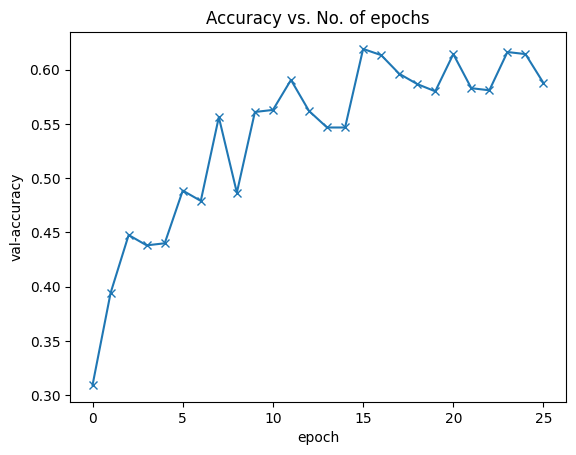

In [ ]:
plot_accuracies(history)

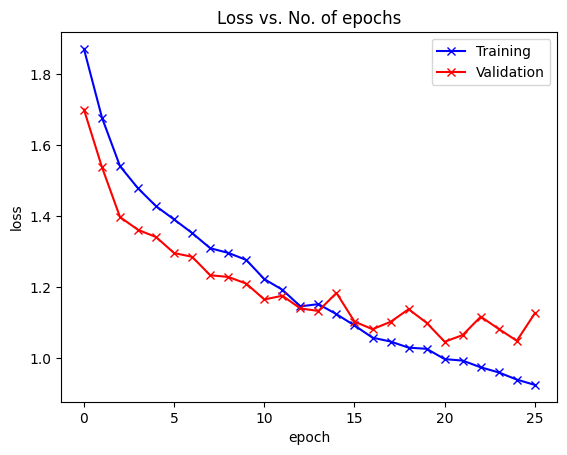

In [ ]:
plot_losses(history)

In [ ]:
model = load_model(CNN_Classification,'best_model.pt')

best_model.pt loaded.


In [ ]:
ytest = get_labels(model,test_set)
ypred = get_prediction(model,test_set)

acc   = accuracy_score(ytest,ypred)
C     = confusion_matrix(ytest,ypred)

print('Performance on Testing subset:')
print('Accuracy:')
print(acc)
print(' ')
print('Confusion Matrix = ')
print(C)

Performance on Testing subset:
Accuracy:
0.5761904761904761
 
Confusion Matrix = 
[[11 12  3  3  0  1  0]
 [ 5 20  2  0  1  1  1]
 [ 1  3 17  2  2  5  0]
 [ 0 12  4 13  0  1  0]
 [ 1  3  7  0 13  6  0]
 [ 0  2  3  1  3 21  0]
 [ 0  1  0  1  1  1 26]]


In [ ]:
C1,acc1 = performance(model,train_set,'Training')
C2,acc2 = performance(model,val_set,'Validation')
C3,acc3 = performance(model,test_set,'Testing')

Training Confusion Matrix = 
[[ 502  260  132   75   50   29    2]
 [  34  751   96   88   18   29   34]
 [  42  100  681   40   74  100   13]
 [  34  136   62  800    6    9    3]
 [  31   55  257    7  514  167   19]
 [   7   29  142   16   84  748   24]
 [   0   19    2    9    2   13 1005]]
 
Training Accuracy = 0.6804
 
Validation Confusion Matrix = 
[[ 32  30  28  27  10  14   9]
 [ 10  95  26  13   0   0   6]
 [  7   7  93   6  12  21   4]
 [  3  29   3 115   0   0   0]
 [ 14   7  38   2  64  22   3]
 [  1   6  22   2   8 107   4]
 [  1   1   0   3   0   1 144]]
 
Validation Accuracy = 0.6190
 
Testing Confusion Matrix = 
[[11 12  3  3  0  1  0]
 [ 5 20  2  0  1  1  1]
 [ 1  3 17  2  2  5  0]
 [ 0 12  4 13  0  1  0]
 [ 1  3  7  0 13  6  0]
 [ 0  2  3  1  3 21  0]
 [ 0  1  0  1  1  1 26]]
 
Testing Accuracy = 0.5762
 
